In [1]:
#importing the necessary libraries

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import re
!pip install wordcloud
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords','punkt','wordnet','omw-1.4','vader_lexicon'])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\niyio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\niyio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\niyio\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\niyio\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\niyio\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
imdb = pd.read_csv("imdb_labelled.txt",sep="\t",header=None)
yelp = pd.read_csv("yelp_labelled.txt",sep="\t",header=None)
amazon = pd.read_csv("amazon_cells_labelled.txt",sep="\t",header=None)

In [3]:
# Add a new column 'Brand' to indicate the source dataframe
imdb['Brand'] = 'imdb'
yelp['Brand'] = 'yelp'
amazon['Brand'] = 'amazon'

# Concatenate the dataframes vertically
reviews = pd.concat([imdb, yelp, amazon], ignore_index=True)
print(reviews)

                                                      0  1   Brand
0     A very, very, very slow-moving, aimless movie ...  0    imdb
1     Not sure who was more lost - the flat characte...  0    imdb
2     Attempting artiness with black & white and cle...  0    imdb
3          Very little music or anything to speak of.    0    imdb
4     The best scene in the movie was when Gerardo i...  1    imdb
...                                                 ... ..     ...
2743  The screen does get smudged easily because it ...  0  amazon
2744  What a piece of junk.. I lose more calls on th...  0  amazon
2745                       Item Does Not Match Picture.  0  amazon
2746  The only thing that disappoint me is the infra...  0  amazon
2747  You can not answer calls with the unit, never ...  0  amazon

[2748 rows x 3 columns]


In [4]:
reviews.columns = ["Text", "Target_Label", "Brand"]
reviews

,Text,Target_Label,Brand
0,"A very, very, very slow-moving, aimless movie ...",0,imdb
1,Not sure who was more lost - the flat characte...,0,imdb
2,Attempting artiness with black & white and cle...,0,imdb
3,Very little music or anything to speak of.,0,imdb
4,The best scene in the movie was when Gerardo i...,1,imdb
...,...,...,...
2743,The screen does get smudged easily because it ...,0,amazon
2744,What a piece of junk.. I lose more calls on th...,0,amazon
2745,Item Does Not Match Picture.,0,amazon
2746,The only thing that disappoint me is the infra...,0,amazon


In [5]:
print("\n All Data Labels")
print(reviews.groupby("Target_Label").count())


 All Data Labels
              Text  Brand
Target_Label             
0             1362   1362
1             1386   1386


In [6]:
#initial positive reviews per brand
(reviews['Target_Label']==1).groupby(reviews['Brand']).sum()

Brand
amazon    500
imdb      386
yelp      500
Name: Target_Label, dtype: int64

In [7]:
# Assuming 'reviews' is your DataFrame
reviews = reviews.drop('Target_Label', axis=1)

In [8]:
def preprocess_data(reviews):
 # Convert text to lowercase
 reviews['Text'] = reviews['Text'].str.strip().str.lower()
 return reviews
reviews = preprocess_data(reviews)
reviews

,Text,Brand
0,"a very, very, very slow-moving, aimless movie ...",imdb
1,not sure who was more lost - the flat characte...,imdb
2,attempting artiness with black & white and cle...,imdb
3,very little music or anything to speak of.,imdb
4,the best scene in the movie was when gerardo i...,imdb
...,...,...
2743,the screen does get smudged easily because it ...,amazon
2744,what a piece of junk.. i lose more calls on th...,amazon
2745,item does not match picture.,amazon
2746,the only thing that disappoint me is the infra...,amazon


In [9]:
from nltk.probability import FreqDist
dist = FreqDist(reviews['Text'])
print(dist)

<FreqDist with 2727 samples and 2748 outcomes>


In [10]:
vocab = dist.keys()
print(vocab)

dict_keys(['a very, very, very slow-moving, aimless movie about a distressed, drifting young man.', 'not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.', 'attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.', 'very little music or anything to speak of.', 'the best scene in the movie was when gerardo is trying to find a song that keeps running through his head.', "the rest of the movie lacks art, charm, meaning... if it's about emptiness, it works i guess because it's empty.", 'wasted two hours.', 'saw the movie today and thought it was a good effort, good messages for kids.', 'a bit predictable.', 'loved the casting of jimmy buffet as the science teacher.', 'and those baby owls were adorable.', "the movie showed a lot of florida at it's best, made it look very appealing.", 'the songs were the best and the m

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

reviews['compound'] = [sentiment.polarity_scores(review)['compound'] for review in reviews['Text']]
reviews['neg'] = [sentiment.polarity_scores(review)['neu'] for review in reviews['Text']]
reviews['neu'] = [sentiment.polarity_scores(review)['neg'] for review in reviews['Text']]
reviews['pos'] = [sentiment.polarity_scores(review)['pos'] for review in reviews['Text']]

In [12]:
reviews.head()

,Text,Brand,compound,neg,neu,pos
0,"a very, very, very slow-moving, aimless movie ...",imdb,-0.4215,0.781,0.219,0.000
1,not sure who was more lost - the flat characte...,imdb,-0.5507,0.778,0.222,0.000
2,attempting artiness with black & white and cle...,imdb,-0.7178,0.667,0.250,0.083
3,very little music or anything to speak of.,imdb,0.0000,1.000,0.000,0.000
4,the best scene in the movie was when gerardo i...,imdb,0.6369,0.819,0.000,0.181


In [13]:
reviews[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,2748.000000,2748.000000,2748.000000,2748.000000
mean,0.145039,0.704830,0.103373,0.191801
std,0.468902,0.224741,0.178101,0.221896
min,-0.992200,0.000000,0.000000,0.000000
25%,-0.238925,0.562750,0.000000,0.000000
50%,0.000000,0.720000,0.000000,0.130000
75%,0.584800,0.868000,0.171000,0.333000
max,0.999200,1.000000,1.000000,1.000000


<Axes: xlabel='compound', ylabel='Count'>

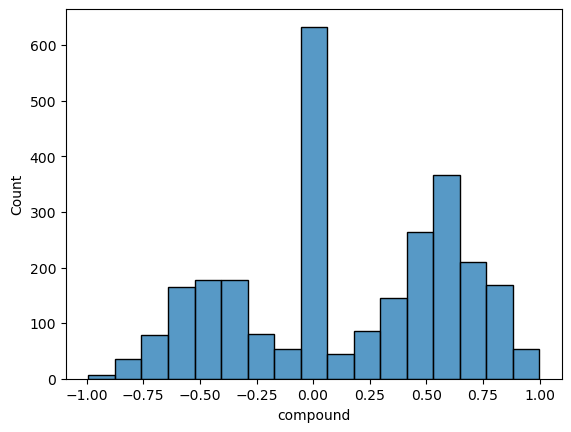

In [14]:
sns.histplot(reviews['compound'])

<Axes: xlabel='pos', ylabel='Count'>

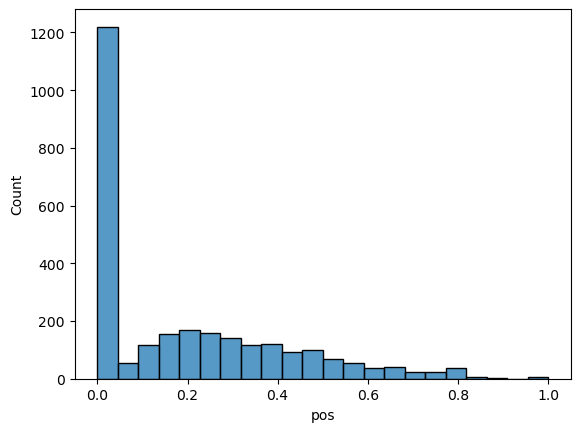

In [15]:
sns.histplot(reviews['pos'])

<Axes: xlabel='neg', ylabel='Count'>

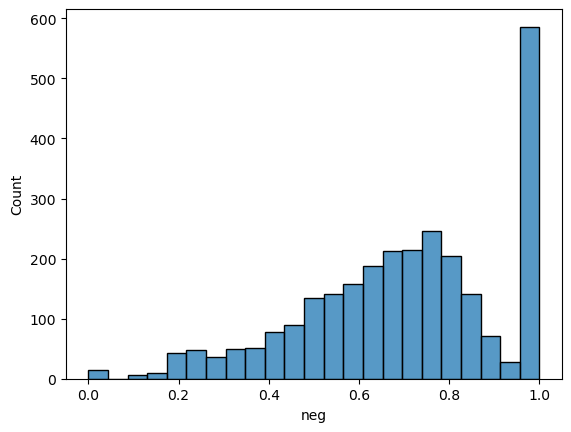

In [16]:
sns.histplot(reviews['neg'])

<Axes: xlabel='neu', ylabel='Count'>

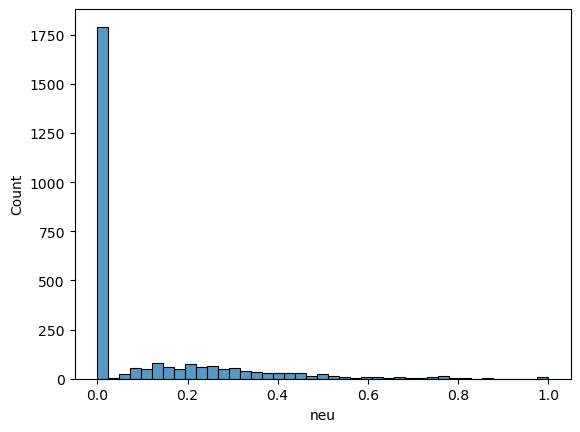

In [17]:
sns.histplot(reviews['neu'])

In [18]:
(reviews['compound']<=0).groupby(reviews['Brand']).sum()

Brand
amazon    513
imdb      377
yelp      499
Name: compound, dtype: int64

In [19]:
(reviews['compound']>0).groupby(reviews['Brand']).sum()

Brand
amazon    487
imdb      371
yelp      501
Name: compound, dtype: int64

In [20]:
(reviews['compound']==0).groupby(reviews['Brand']).sum()

Brand
amazon    227
imdb      119
yelp      243
Name: compound, dtype: int64

In [21]:
percent_negative = pd.DataFrame((reviews['compound']<=0).groupby(reviews['Brand']).sum() 
                                /reviews['Brand'].groupby(reviews['Brand']).count()*100,
                                columns=['% negative reviews']).sort_values(by='% negative reviews')
percent_negative

,% negative reviews
Brand,
yelp,49.90000
imdb,50.40107
amazon,51.30000


<Axes: xlabel='% negative reviews', ylabel='Brand'>

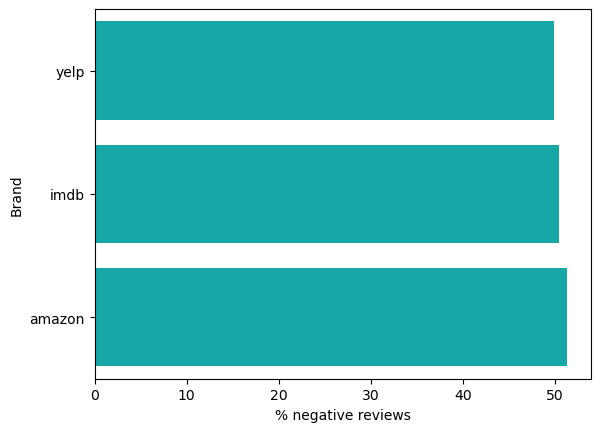

In [22]:
sns.barplot(data=percent_negative, x='% negative reviews', y=percent_negative.index, color='c')

In [23]:
percent_positive = pd.DataFrame((reviews['compound']>0).groupby(reviews['Brand']).sum() 
                                /reviews['Brand'].groupby(reviews['Brand']).count()*100,
                                columns=['% positive reviews']).sort_values(by='% positive reviews')
percent_positive

,% positive reviews
Brand,
amazon,48.70000
imdb,49.59893
yelp,50.10000


<Axes: xlabel='% positive reviews', ylabel='Brand'>

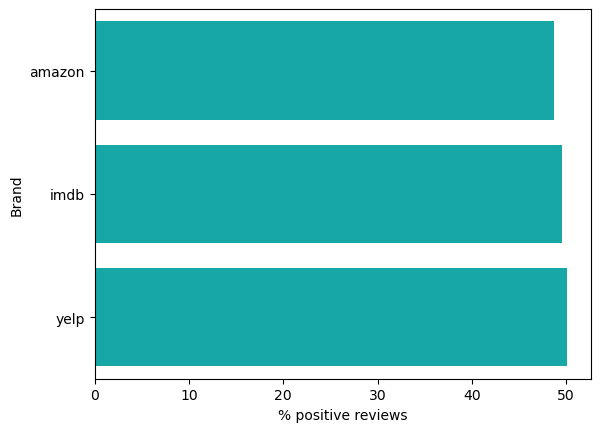

In [24]:
sns.barplot(data=percent_positive, x='% positive reviews', y=percent_positive.index, color='c')

In [25]:
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [26]:
#developing a function to hanlde all preprocessing steps at once
def preprocess_text(text):
    tokenized_reviews = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text) #Tokenize
    cleaned_tokens = [word.lower() for word in tokenized_reviews if word.lower() not in stop_words] #Remove
    stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens] #Stemming
    return stemmed_text

In [27]:
reviews['Processed_Text'] = reviews['Text'].apply(preprocess_text)
reviews.head()

,Text,Brand,compound,neg,neu,pos,Processed_Text
0,"a very, very, very slow-moving, aimless movie ...",imdb,-0.4215,0.781,0.219,0.000,"[slow, move, aimless, movi, distress, drift, y..."
1,not sure who was more lost - the flat characte...,imdb,-0.5507,0.778,0.222,0.000,"[sure, lost, flat, charact, audienc, nearli, h..."
2,attempting artiness with black & white and cle...,imdb,-0.7178,0.667,0.250,0.083,"[attempt, arti, black, white, clever, camera, ..."
3,very little music or anything to speak of.,imdb,0.0000,1.000,0.000,0.000,"[littl, music, anyth, speak]"
4,the best scene in the movie was when gerardo i...,imdb,0.6369,0.819,0.000,0.181,"[best, scene, movi, gerardo, tri, find, song, ..."


In [28]:
brands = ['imdb', 'yelp', 'amazon']
reviews_pos_subset = reviews.loc[(reviews['Brand'].isin(brands)) & (reviews['compound']>0),:]
reviews_neg_subset = reviews.loc[(reviews['Brand'].isin(brands)) & (reviews['compound']<=0),:]
reviews_pos_subset.head()

,Text,Brand,compound,neg,neu,pos,Processed_Text
4,the best scene in the movie was when gerardo i...,imdb,0.6369,0.819,0.0,0.181,"[best, scene, movi, gerardo, tri, find, song, ..."
7,saw the movie today and thought it was a good ...,imdb,0.7003,0.674,0.0,0.326,"[saw, movi, today, thought, good, effort, good..."
9,loved the casting of jimmy buffet as the scien...,imdb,0.5994,0.698,0.0,0.302,"[love, cast, jimmi, buffet, scienc, teacher]"
10,and those baby owls were adorable.,imdb,0.4939,0.610,0.0,0.390,"[babi, owl, ador]"
11,the movie showed a lot of florida at it's best...,imdb,0.6369,0.756,0.0,0.244,"[movi, show, lot, florida, best, made, look, a..."


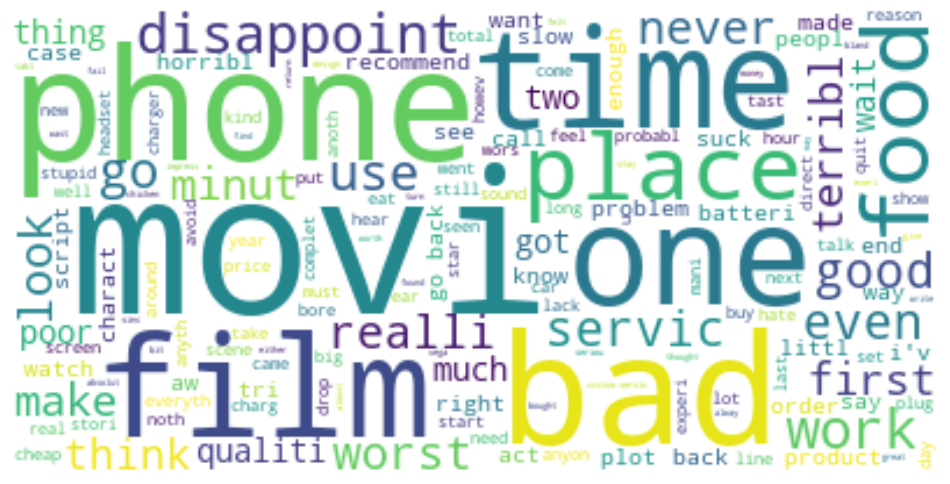

In [29]:
neg_tokens = [word for review in reviews_neg_subset['Processed_Text'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

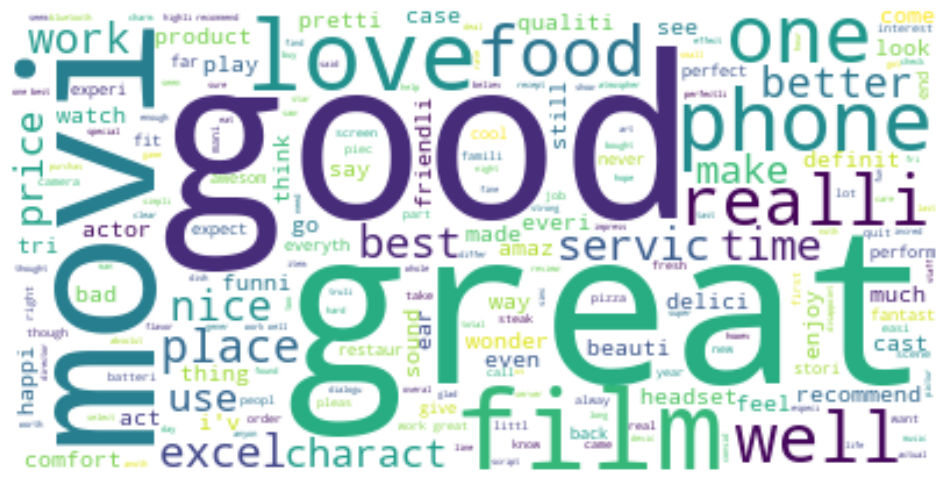

In [30]:
pos_tokens = [word for review in reviews_pos_subset['Processed_Text'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(pos_tokens))

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
pos_freqdist = FreqDist(pos_tokens)
pos_freqdist.tabulate(10)

great  good  movi  film     1  like     0  love  work phone 
  195   190   121   118   108   103   100    88    87    86 


In [32]:
neg_freqdist = FreqDist(neg_tokens)
neg_freqdist.tabulate(10)

 movi phone   bad  time  film   one    go place  food  work 
   90    89    81    75    67    65    64    63    62    58 


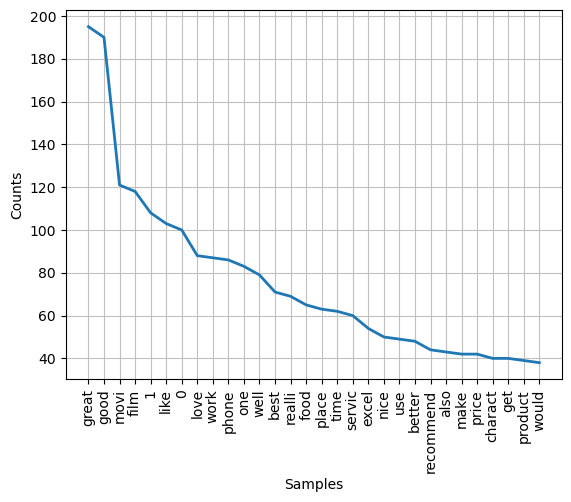

<Axes: xlabel='Samples', ylabel='Counts'>

In [33]:
pos_freqdist.plot(30)

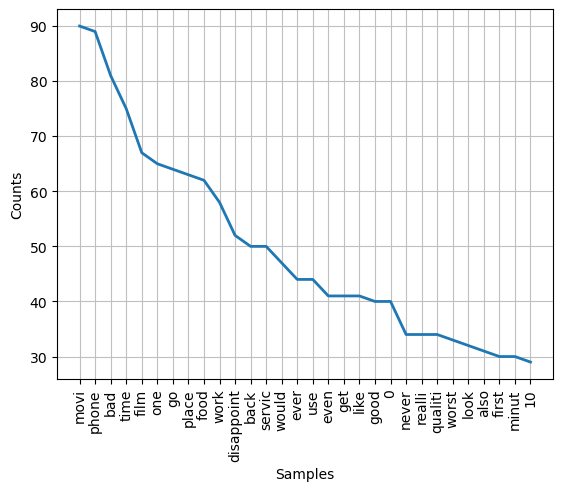

<Axes: xlabel='Samples', ylabel='Counts'>

In [34]:
neg_freqdist.plot(30)

In [35]:
# Rounding up values less than 0.3 (negative reviews) to 0 and values greater than 0.3 to 1 (positive reviews)
reviews['compound_rounded'] = reviews['compound'].apply(lambda x: 0 if x < 0.3 else 1)
reviews

,Text,Brand,compound,neg,neu,pos,Processed_Text,compound_rounded
0,"a very, very, very slow-moving, aimless movie ...",imdb,-0.4215,0.781,0.219,0.000,"[slow, move, aimless, movi, distress, drift, y...",0
1,not sure who was more lost - the flat characte...,imdb,-0.5507,0.778,0.222,0.000,"[sure, lost, flat, charact, audienc, nearli, h...",0
2,attempting artiness with black & white and cle...,imdb,-0.7178,0.667,0.250,0.083,"[attempt, arti, black, white, clever, camera, ...",0
3,very little music or anything to speak of.,imdb,0.0000,1.000,0.000,0.000,"[littl, music, anyth, speak]",0
4,the best scene in the movie was when gerardo i...,imdb,0.6369,0.819,0.000,0.181,"[best, scene, movi, gerardo, tri, find, song, ...",1
...,...,...,...,...,...,...,...,...
2743,the screen does get smudged easily because it ...,amazon,0.3400,0.833,0.000,0.167,"[screen, get, smudg, easili, touch, ear, face]",1
2744,what a piece of junk.. i lose more calls on th...,amazon,-0.4019,0.769,0.231,0.000,"[piec, junk, lose, call, phone]",0
2745,item does not match picture.,amazon,0.0000,1.000,0.000,0.000,"[item, match, pictur]",0
2746,the only thing that disappoint me is the infra...,amazon,-0.4019,0.803,0.197,0.000,"[thing, disappoint, infra, red, port, irda]",0


In [36]:
print("\n All Data Labels")
print(reviews.groupby("compound_rounded").count())


 All Data Labels
                  Text  Brand  compound   neg   neu   pos  Processed_Text
compound_rounded                                                         
0                 1540   1540      1540  1540  1540  1540            1540
1                 1208   1208      1208  1208  1208  1208            1208


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X=vectorizer.fit_transform(reviews['Processed_Text'].map(''.join))
X=pd.DataFrame(X.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,2894,2895,2896,2897,2898,2899,2900,2901,2902,2903
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
from sklearn.model_selection import train_test_split

y = reviews['compound_rounded']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size =0.8, test_size = 0.2, random_state=42)

In [39]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
print(model.fit(X, y))
y_pred =model.predict(X_test)
model.score(X_test, y_test)

MultinomialNB()


0.9945454545454545

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[314   1]
 [  2 233]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       315
           1       1.00      0.99      0.99       235

    accuracy                           0.99       550
   macro avg       0.99      0.99      0.99       550
weighted avg       0.99      0.99      0.99       550



In [41]:
model.predict(vectorizer.transform(['This is quite disappointing, never going for it again!']))

array([0], dtype=int64)

In [42]:
def expression_check(prediction_input):
 if prediction_input == 0:
     print("Input statement has Negative Sentiment.")
 elif prediction_input == 1:
     print("Input statement has Positive Sentiment.")
 else:
     print("Invalid Statement.")

In [43]:
def sentiment_predictor(input):
    transformed_input = vectorizer.transform(input)
    prediction = model.predict(transformed_input)
    expression_check(prediction)

In [44]:
input1 = ["I don't like it!"]
input2 = ["I love it"]

In [45]:
sentiment_predictor(input1)
sentiment_predictor(input2)

Input statement has Negative Sentiment.
Input statement has Positive Sentiment.
